# 付録C 日本語版付録

例C-1 データセットを月ごとに並べてプロットする例

In [ ]:
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 33.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=fd3c9337fdd8fdd80d3ff91a0ab0a34ca65fdb8a421a2d122b6c2139b3f21906
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize_matplotlib


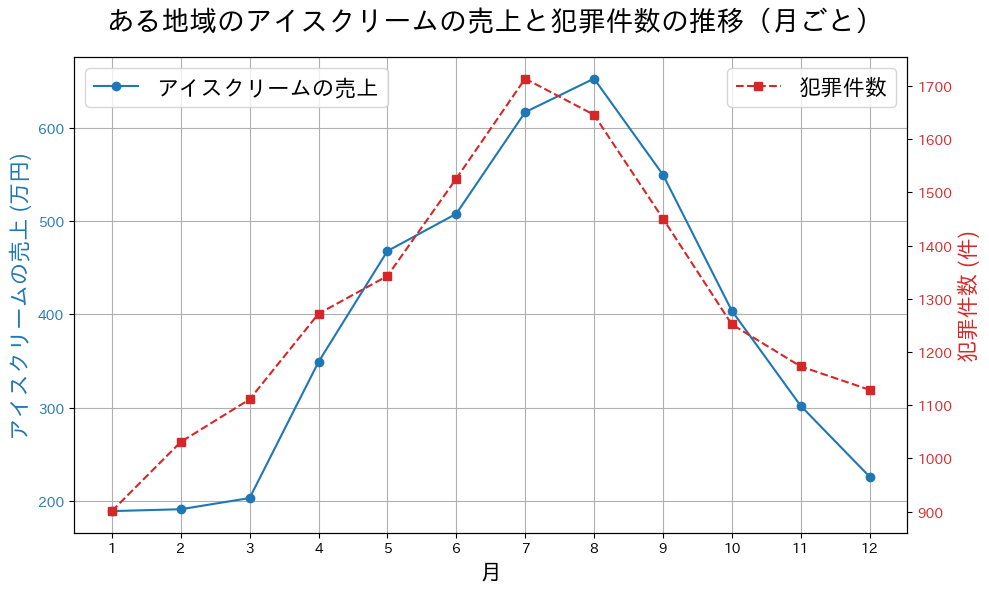

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib

import numpy as np
import pandas as pd

# アイスクリームの売上（万円）
ice_cream_sales = [189, 191, 203, 349,
                   468, 508, 617, 653,
                   550, 404, 302, 226]
# 犯罪件数（件）
crime_rate = [901, 1031, 1111, 1272,
              1343, 1526, 1714, 1646,
              1451, 1252, 1173, 1129]
# データフレームを作成
df = pd.DataFrame({
    "IceCreamSales": ice_cream_sales,
    "CrimeRate": crime_rate
})

# x軸を月としてグラフを重ねて描画
fig, ax1 = plt.subplots(figsize=(10, 6))

# IceCreamSalesを左側y軸で描画
color = 'tab:blue'
ax1.set_xlabel('月', fontsize=16)
ax1.set_ylabel('アイスクリームの売上 (万円)', color=color, fontsize=16)
ax1.plot(df.index + 1, df['IceCreamSales'], marker='o', color=color, label='アイスクリームの売上')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(df.index + 1)
#
# # CrimeRateを右側y軸で描画
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('犯罪件数 (件)', color=color, fontsize=16)
ax2.plot(df.index + 1, df['CrimeRate'], marker='s', linestyle='--', color=color, label='犯罪件数')
ax2.tick_params(axis='y', labelcolor=color)
# 凡例を追加
ax1.legend(loc='upper left', fontsize=16)  # 左側y軸の凡例
ax2.legend(loc='upper right', fontsize=16)  # 右側y軸の凡例
#
# # タイトルとグリッド設定
fig.suptitle('ある地域のアイスクリームの売上と犯罪件数の推移（月ごと）', fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.9)
ax1.grid(True)

plt.show();

例C-2 データの相関係数とp値を求める例

In [3]:
# 相関行列を確認
correlation_matrix = df.corr()
correlation_matrix

,IceCreamSales,CrimeRate
IceCreamSales,1.000000,0.961761
CrimeRate,0.961761,1.000000


In [4]:
# 相関係数とp値を求める
n = len(df)

from scipy import stats

correlation = np.corrcoef(df["IceCreamSales"], df["CrimeRate"])[0, 1]
t = correlation * np.sqrt((n - 2) / (1 - correlation ** 2))

if t > 0:
    p_value = 1.0 - stats.t(n - 2).cdf(t)
else:
    p_value = t(n - 2).cdf(t)

# 両側検定のため、2を掛ける
p_value = p_value * 2

# 結果を表示
print(f"相関係数: {correlation:.06f}")
print(f"p値: {p_value:.10f}")

相関係数: 0.961761
p値: 0.0000006038


例C-3 偏相関係数とp値を求める例

In [5]:
import numpy as np
import pandas as pd

temperature = [5, 6, 10, 15,
               20, 24, 28, 30,
               25, 18, 12, 7]
ice_cream_sales = [189, 191, 203, 349,
                   468, 508, 617, 653,
                   550, 404, 302, 226]
crime_rate = [901, 1031, 1111, 1272,
              1343, 1526, 1714, 1646,
              1451, 1252, 1173, 1129]

df = pd.DataFrame({
    "Temperature": temperature,
    "IceCreamSales": ice_cream_sales,
    "CrimeRate": crime_rate
})

# 偏相関係数の定義（3変数）
def compute_partial_correlation(x, y, z):
    r_xy = np.corrcoef(x, y)[0, 1]
    r_xz = np.corrcoef(x, z)[0, 1]
    r_yz = np.corrcoef(y, z)[0, 1]
    numerator = r_xy - r_xz * r_yz
    denominator = np.sqrt((1 - r_xz ** 2) * (1 - r_yz ** 2))
    return numerator / denominator

# Temperatureの影響を除去した
# IceCreamSalesとCrimeRateの偏相関係数を求める
partial_corr_result = compute_partial_correlation(
    df["IceCreamSales"],
    df["CrimeRate"],
    df["Temperature"]
)

# p値を求める
n = len(df)

# 統計量を求める（自由度 n - 3）
t = partial_corr_result * np.sqrt((n - 3) / (1 - partial_corr_result**2))

from scipy import stats

if t > 0:
    p_value = 1.0 - stats.t(n - 2).cdf(t)
else:
    p_value = t(n - 2).cdf(t)

# 両側検定のため、2を掛ける
p_value = p_value * 2

# 結果を表示
print(f"偏相関係数: {partial_corr_result:.03f}")
print(f"p値: {p_value:.03f}")

偏相関係数: 0.067
p値: 0.844


例C-4 偏相関係数とp値をライブラリを使って求める例

In [6]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.4 MB/s eta 0:00:00


In [7]:
import numpy as np
import pandas as pd

temperature = [5, 6, 10, 15,
               20, 24, 28, 30,
               25, 18, 12, 7]
ice_cream_sales = [189, 191, 203, 349,
                   468, 508, 617, 653,
                   550, 404, 302, 226]
crime_rate = [901, 1031, 1111, 1272,
              1343, 1526, 1714, 1646,
              1451, 1252, 1173, 1129]

df = pd.DataFrame({
    "Temperature": temperature,
    "IceCreamSales": ice_cream_sales,
    "CrimeRate": crime_rate
})

import pingouin as pg

# 偏相関係数やp値を求める
partial_corr_result = pg.partial_corr(data=df, x='IceCreamSales', y='CrimeRate', covar='Temperature')
partial_corr = partial_corr_result["r"][0]
p_value = partial_corr_result["p-val"][0]

# 結果を表示
print(f"偏相関係数: {partial_corr:.03f}")
print(f"p値: {p_value:.03f}")

偏相関係数: 0.067
p値: 0.845


<ipython-input-7-685f531fb1de>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  partial_corr = partial_corr_result["r"][0]
<ipython-input-7-685f531fb1de>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = partial_corr_result["p-val"][0]


例C-5 gcastleを使って因果探索を行う例

In [8]:
!pip install gcastle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 3.6 MB/s eta 0:00:00


In [19]:
import pandas as pd

temperature = [5, 6, 10, 15,
               20, 24, 28, 30,
               25, 18, 12, 7]
ice_cream_sales = [189, 191, 203, 349,
                   468, 508, 617, 653,
                   550, 404, 302, 226]
crime_rate = [901, 1031, 1111, 1272,
              1343, 1526, 1714, 1646,
              1451, 1252, 1173, 1129]

df = pd.DataFrame({
    "Temperature": temperature,
    "IceCreamSales": ice_cream_sales,
    "CrimeRate": crime_rate
})
data = df.values.astype(float)
cols = df.columns.tolist()

from castle.algorithms import Notears

# NOTEARSアルゴリズムによって因果行列（因果関係の行列）を求める
notears = Notears()
notears.learn(data=df.values, columns=df.columns)
print(notears.causal_matrix)

[[0 1 1]
 [0 0 0]
 [0 0 0]]


例C-6 因果行列から因果グラフをプロットする例

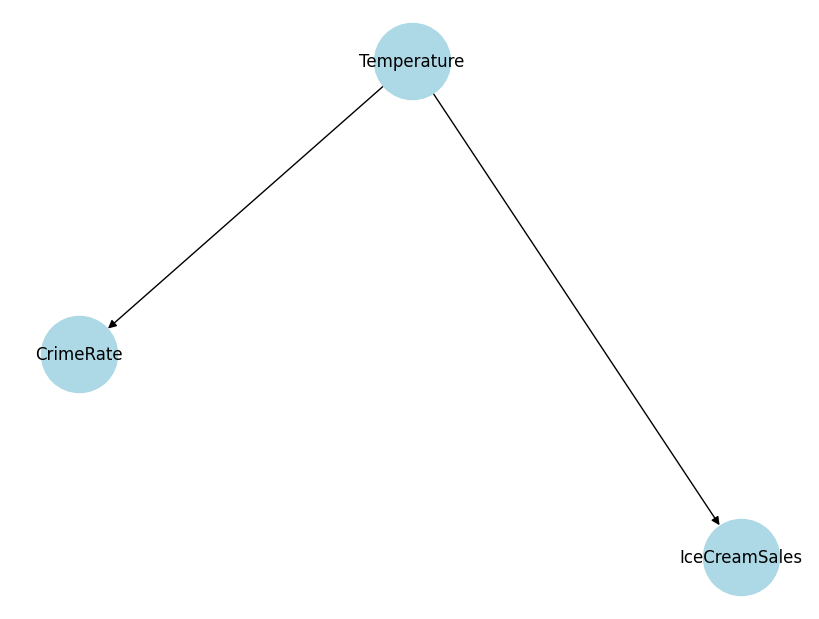

In [20]:
import networkx as nx

# 因果行列をNetworkXの有向グラフに変換する
causal_matrix = notears.causal_matrix
graph = nx.DiGraph()

# 因果行列に基づいてエッジを追加する
for i in range(causal_matrix.shape[0]):
    for j in range(causal_matrix.shape[1]):
        if causal_matrix[i, j] != 0:  # ゼロでない値のエッジを採用する
            graph.add_edge(cols[i], cols[j])
import matplotlib.pyplot as plt

# 描画する
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(graph)
nx.draw(graph, pos,
        with_labels=True,
        node_size=3000,
        node_color="lightblue", font_size=12, arrowsize=12, arrows=True)
plt.show();

例C-7 NOTEASを簡易的に自前で実装した例

Iter 00: h=3.297e+00, rho=1.0e+00
Iter 01: h=2.685e+00, rho=1.0e+01
Iter 02: h=1.864e+00, rho=1.0e+02
Iter 03: h=1.265e+00, rho=1.0e+03
Iter 04: h=6.020e-01, rho=1.0e+04
Iter 05: h=1.985e-01, rho=1.0e+05
Iter 06: h=5.895e-02, rho=1.0e+06
Iter 07: h=1.132e-02, rho=1.0e+07
Iter 08: h=2.636e-03, rho=1.0e+08
Iter 09: h=5.778e-04, rho=1.0e+09
Iter 10: h=1.249e-04, rho=1.0e+10
Iter 11: h=2.690e-05, rho=1.0e+11
Iter 12: h=5.805e-06, rho=1.0e+12
Iter 13: h=1.299e-06, rho=1.0e+13
Iter 14: h=2.813e-07, rho=1.0e+14
Iter 15: h=6.086e-08, rho=1.0e+15
Iter 16: h=1.312e-08, rho=1.0e+16
Iter 17: h=2.827e-09, rho=1.0e+17
[[   0.      22.329 -105.739]
 [   0.       0.       0.   ]
 [   0.       0.       0.   ]]


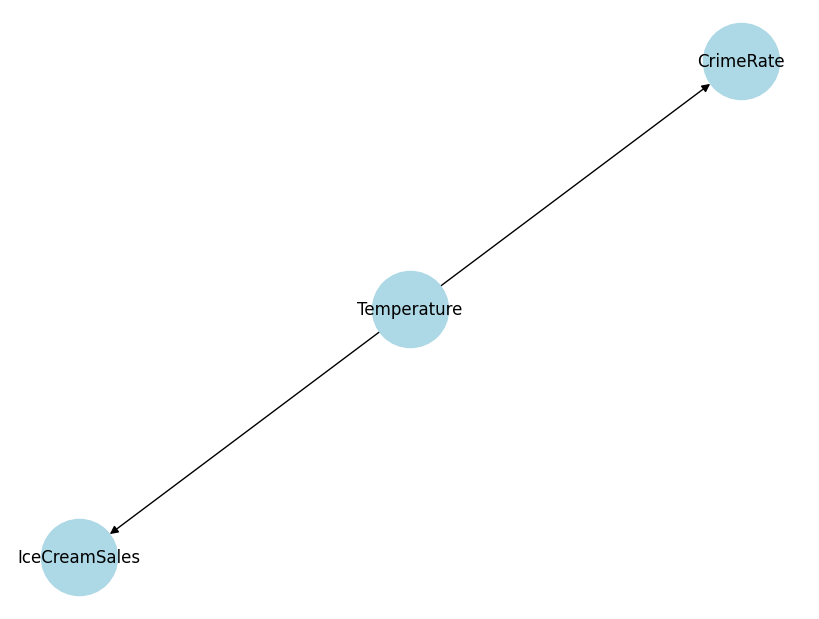

In [17]:
# 例C-7 NOTEASを簡易的に自前で実装した例
import numpy as np
import pandas as pd

temperature = [5, 6, 10, 15,
               20, 24, 28, 30,
               25, 18, 12, 7]
ice_cream_sales = [189, 191, 203, 349,
                   468, 508, 617, 653,
                   550, 404, 302, 226]
crime_rate = [901, 1031, 1111, 1272,
              1343, 1526, 1714, 1646,
              1451, 1252, 1173, 1129]

df = pd.DataFrame({
    "Temperature": temperature,
    "IceCreamSales": ice_cream_sales,
    "CrimeRate": crime_rate
})

from scipy.linalg import expm
from scipy.optimize import minimize


def _h(W):
    """非巡回制約を実装したもの"""
    d = W.shape[0]
    return np.trace(expm(W * W)) - d


def _loss(W, X, l1):
    """回帰損失とL1正則化を実装したもの"""
    n = X.shape[0]
    R = X @ W
    mse = 0.5 / n * np.square(X - R).sum()
    l1 = l1 * np.abs(W).sum()
    return mse + l1


def _grad(W, X, l1):
    """損失の勾配を実装したもの"""
    n = X.shape[0]
    R = X @ W
    grad_m = X.T @ (R - X) / n
    grad_l1 = l1 * np.sign(W)
    return grad_m + grad_l1


def notears(X):
    """
    NOTEARSアルゴリズムを簡易的に実装したもの
    """
    X = X.astype(float)
    n, d = X.shape
    W = np.zeros((d, d), dtype=float)

    alpha = 0.0  # ラグランジュ乗数
    rho = 1.0  # ペナルティ係数
    l1 = 0.01  # L1正則化係数
    _threshold = 10.0  # しきい値
    # 100回反復する
    for it in range(100):
        def obj(w_vec):
            Wmat = w_vec.reshape(d, d)
            loss = _loss(Wmat, X, l1)
            h_val = _h(Wmat)
            aug_lag = loss + alpha * h_val + 0.5 * rho * h_val ** 2
            return aug_lag

        def obj_grad(w_vec):
            Wmat = w_vec.reshape(d, d)
            loss_grad = _grad(Wmat, X, l1)
            h_val = _h(Wmat)
            # 微分する
            E = expm(Wmat * Wmat).T * 2 * Wmat
            aug_grad = loss_grad + (alpha + rho * h_val) * E
            return aug_grad.ravel()

        # SciPyのL-BFGS-Bを使用して最適化を実行する
        sol = minimize(
            obj,
            W.ravel(),
            method="L-BFGS-B",
            jac=obj_grad
        )
        W = sol.x.reshape(d, d)
        h_val = _h(W)
        print(f"Iter {it:02d}: h={h_val:.3e}, rho={rho:.1e}")

        # 収束したか判定する
        if h_val <= 1e-8 or 1e+16 < rho:
            break

        # 乗数を更新する
        alpha += rho * h_val
        # 係数を更新する
        rho *= 10

    # しきい値以下の値のセルを切り落とす
    W[np.abs(W) < _threshold] = 0.0
    return W


causal_matrix = notears(df.values)
print(causal_matrix)

import networkx as nx

# 因果関係の行列をNetworkXの有向グラフに変換する
graph = nx.DiGraph()
cols = df.columns.tolist()

# 因果行列に基づいてエッジを追加する
for i in range(causal_matrix.shape[0]):
    for j in range(causal_matrix.shape[1]):
        if 10 <= abs(causal_matrix[i, j]):  # ゼロでない値のエッジを採用する
            graph.add_edge(cols[i], cols[j])
import matplotlib.pyplot as plt

# 描画する
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(graph)
nx.draw(graph, pos,
        with_labels=True,
        node_size=3000,
        node_color="lightblue", font_size=12, arrowsize=12, arrows=True)
plt.show();